# Pymaceuticals Inc.
---

### Analysis

 Three Observations
 
     Of the four drugs analyzed, Capomulin and Ramicane showed to be the most effective in terms of tumor volume.
     
     Weight seemed to have a positive correlation with Tumor Size.
     
     Ramicane and Capomulin also had very low variance comared to other drugs.

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how="left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dupes_index = np.nonzero(combined_df.duplicated(["Mouse ID", "Timepoint"]))
dupes_mice_rows = combined_df.loc[dupes_index]
dupe_mice = dupes_mice_rows["Mouse ID"].unique()
dupe_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_rows = combined_df["Mouse ID"] == 'g989'
dupes_df = combined_df.loc[dupe_rows]
dupes_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_combined_df = combined_df.loc[(combined_df["Mouse ID"] != "g989")]
clean_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_df["Mouse ID"].unique())

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_STDev = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_SEM = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
Summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                           "Median Tumor Volume": median_tumor,
                           "Tumor Volume Variance": tumor_variance,
                           "Tumor Volume Std. Dev.": tumor_STDev,
                           "Tumor Volume Std. Err.": tumor_SEM})
Summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Sum_Stats_2 = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
Sum_Stats_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

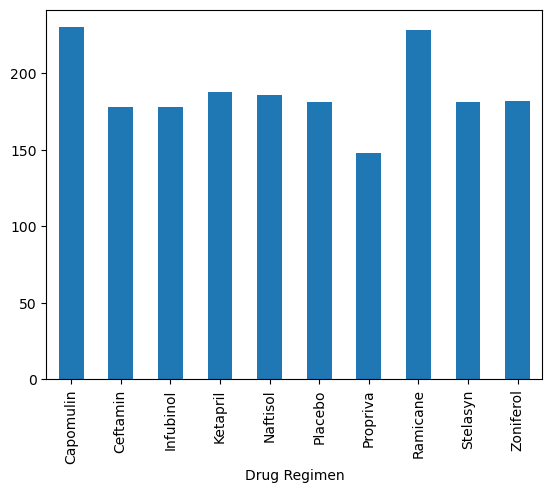

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Num_Trials = clean_combined_df.groupby("Drug Regimen").count()
x_labels = list(Num_Trials.index.values)
values = Num_Trials["Mouse ID"]
values.plot(kind="bar")
plt.show()

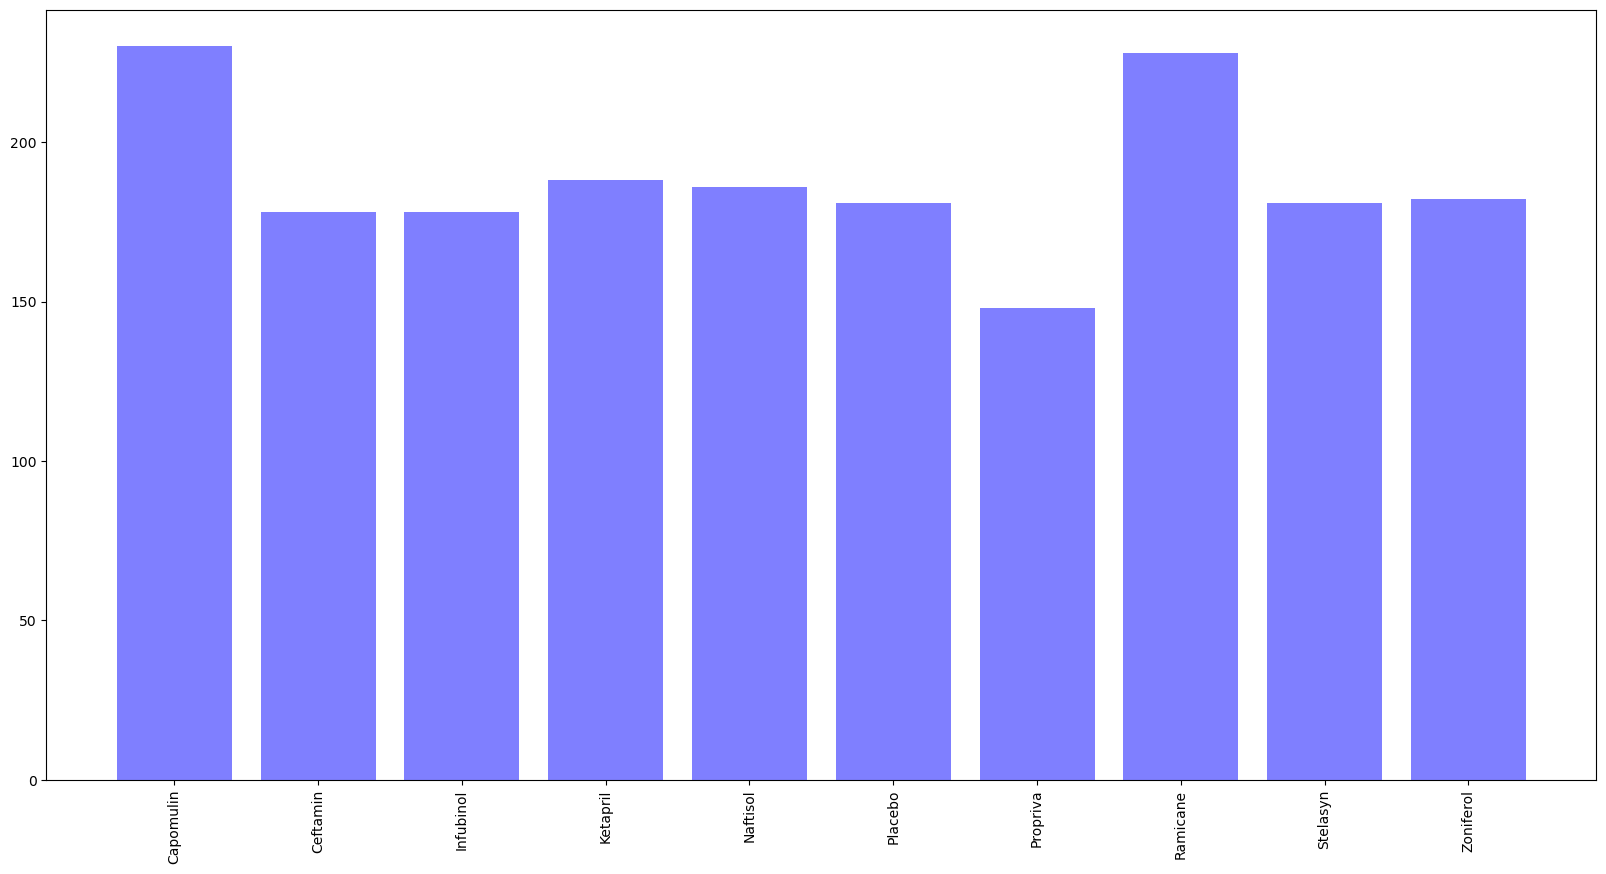

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(20,10))
plt.bar(x_labels, values, color='b', alpha=0.5)
tick_locations = [value for value in x_labels]
plt.xticks(tick_locations, x_labels, rotation="vertical")
plt.show()

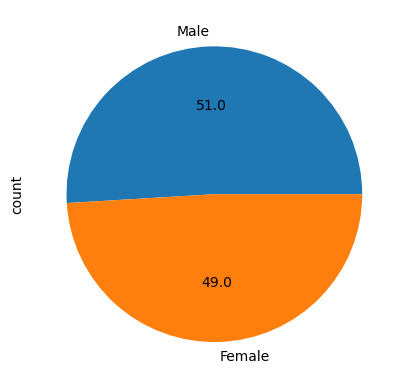

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_values = clean_combined_df["Sex"].value_counts()
sex_values.plot(kind="pie", autopct='%.1f')
plt.show()

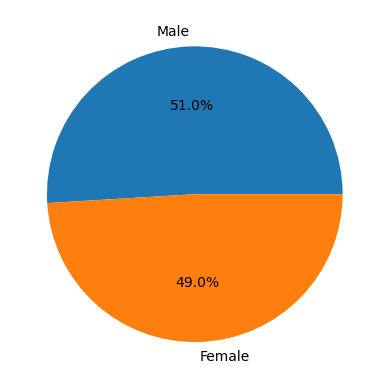

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = list(sex_values.index.values)
plt.pie(sex_values, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_combined_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Last_Tumor_df = pd.merge(clean_combined_df, last_timepoint, on=["Mouse ID"], how="left")
Last_Tumor_df.head()

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.0,0,Capomulin,Female,9,22,45
1,f932,0,45.0,0,Ketapril,Male,15,29,0
2,g107,0,45.0,0,Ketapril,Female,2,29,35
3,a457,0,45.0,0,Ketapril,Female,11,30,10
4,c819,0,45.0,0,Ketapril,Male,21,25,40


In [76]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
Last_Tumor_Vol = pd.DataFrame()
quartiles = pd.DataFrame()
outliers = pd.DataFrame

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatments in treatments_list:
    
    new_column_name = f"{treatments}"
    last_tumor_vols=[]
    
    # Locate the rows which contain mice on each drug and get the final tumor volumes
    rows_mice_data = Last_Tumor_df.loc[(Last_Tumor_df['Drug Regimen'] == treatments) & (Last_Tumor_df['Timepoint_x'] == Last_Tumor_df['Timepoint_y'])]
    last_tumor_vols = rows_mice_data["Tumor Volume (mm3)"]
    last_tumor_vols = last_tumor_vols.reset_index(drop=True)
    Last_Tumor_Vol[new_column_name] = last_tumor_vols
    
# Determine outliers using upper and lower bounds
quartiles = Last_Tumor_Vol.quantile([.25,.5,.75])
quartiles

,Capomulin,Ramicane,Infubinol,Ceftamin
0.25,32.377357,31.560470,54.048608,48.722078
0.50,38.125164,36.561652,60.165180,59.851956
0.75,40.159220,40.659006,65.525743,64.299830


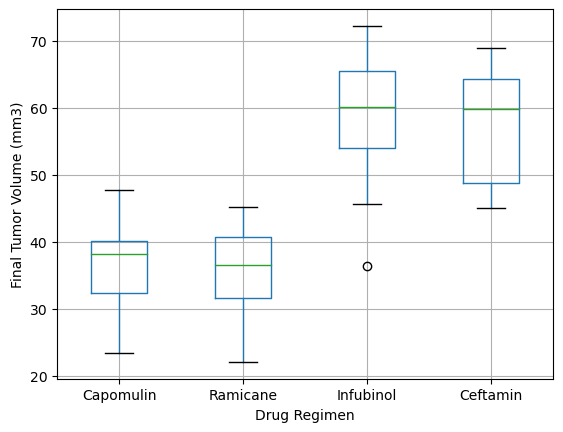

In [78]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Last_Tumor_Vol.boxplot(column=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

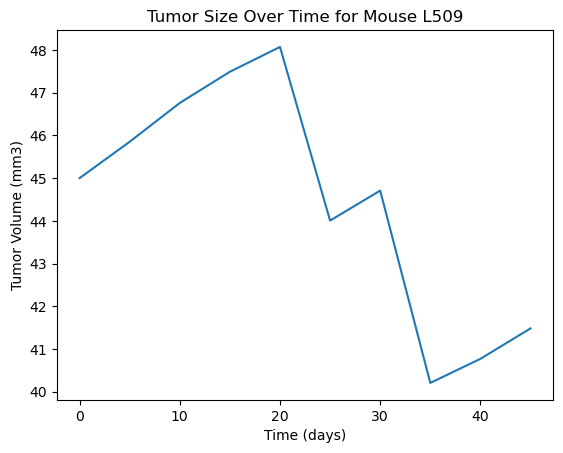

In [82]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = clean_combined_df.loc[clean_combined_df['Mouse ID'] == "l509"]
x_values = mouse_data['Timepoint']
y_values = mouse_data['Tumor Volume (mm3)']
plt.plot(x_values, y_values)
plt.title("Tumor Size Over Time for Mouse L509")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

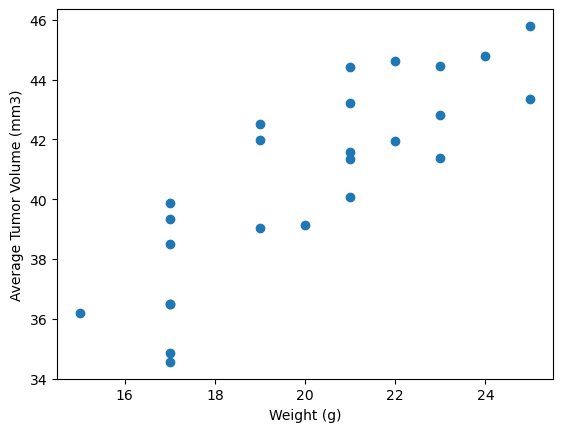

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_combined_df.loc[clean_combined_df["Drug Regimen"] == "Capomulin"]
avg_tumor = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
x_values = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(x_values, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

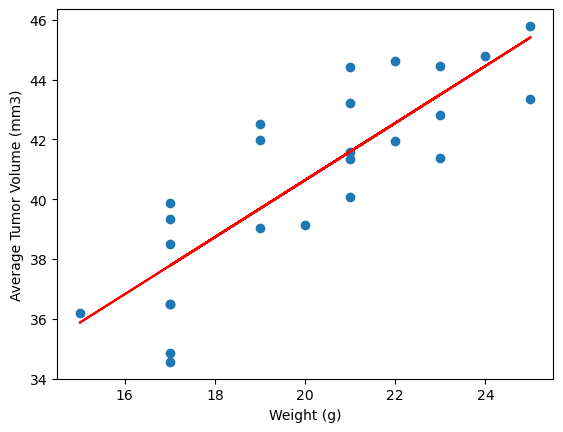

The r-squared value is: 0.709
Linear Regression Model: y = 0.954*x + 21.552


In [100]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, avg_tumor)
regress_values = x_values*slope + intercept
plt.scatter(x_values, avg_tumor)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
print(f"The r-squared value is: {round(rvalue**2,3)}")
print(f"Linear Regression Model: y = {round(slope,3)}*x + {round(intercept,3)}")